# 01. Importing libraries

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. 

# 02. Importing Data 
#### The data is downloaded from "https://data.nasdaq.com/data/FRED-federal-reserve-economic-data/documentation", Federal Reserve Economic Data, Consumer Price Index for All Urban Consumers.

In [3]:
# Configure API key 
quandl.ApiConfig.api_key = '2ArVRmms7y1dXFRCiSxR'

In [4]:
# CPIAUCSL	Consumer Price Index for All Urban Consumers: All Items, from "Federal Reserve Economic Data"

data = quandl.get('FRED/CPIAUCSL')

# 03. Subsetting and analyzing the data - Creating a line chart 

In [5]:
data.head()


,Value
Date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [6]:
# Reseting index to access the Date column for filtering
data_reset = data.reset_index()

# Creating a subset of data from 1980 to the present
subset_start_date = '1980-01-01'
subset_end_date = '2022-12-31' 
data_subset = data_reset[(data_reset['Date'] >= subset_start_date) & (data_reset['Date'] <= subset_end_date)]

# Resetting 'Date' as the index of the new DataFrame
data_subset.set_index('Date', inplace=True)

# Displaying the first few rows of the subset data
data_subset.head()


,Value
Date,
1980-01-01,78.0
1980-02-01,79.0
1980-03-01,80.1
1980-04-01,80.9
1980-05-01,81.7


In [7]:
data_subset

,Value
Date,
1980-01-01,78.000
1980-02-01,79.000
1980-03-01,80.100
1980-04-01,80.900
1980-05-01,81.700
...,...
2021-09-01,274.214
2021-10-01,276.590
2021-11-01,278.524


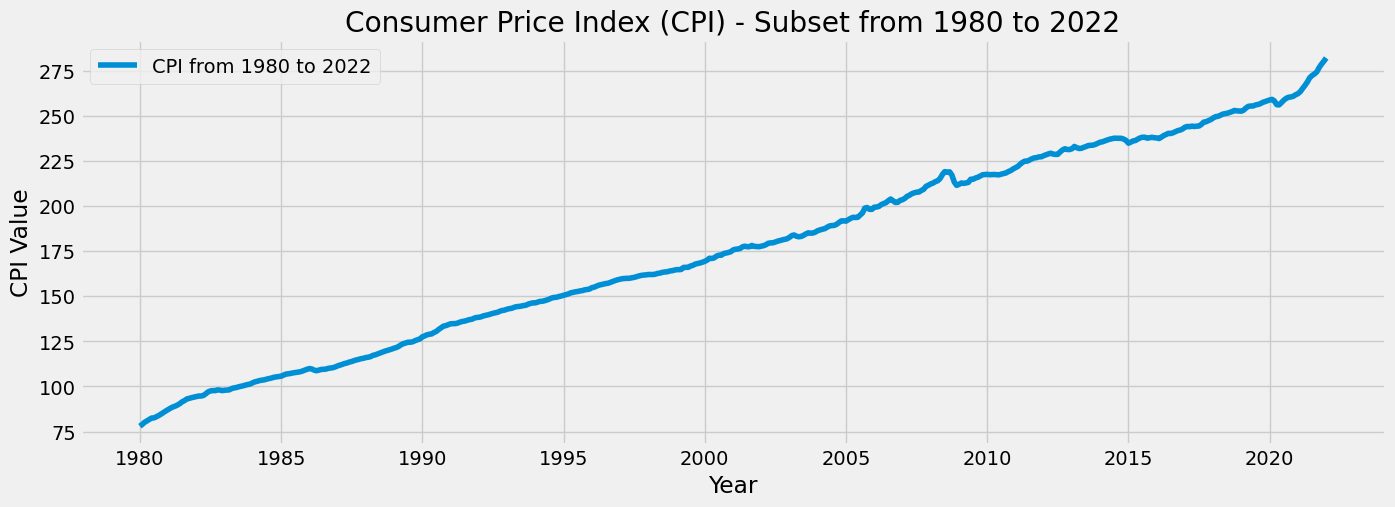

In [8]:
# Plotting the line chart of the CPI data subset
plt.figure(figsize=(15, 5))
plt.plot(data_subset, label='CPI from 1980 to 2022')  # Adjust the label and dates as per your actual data
plt.title('Consumer Price Index (CPI) - Subset from 1980 to 2022')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.legend()
plt.show()


### The chart encapsulates the inflation trend in the urban consumer prices over four decades, highlighting the overall increase in the cost of living.

# 04. Decomposing the data’s components

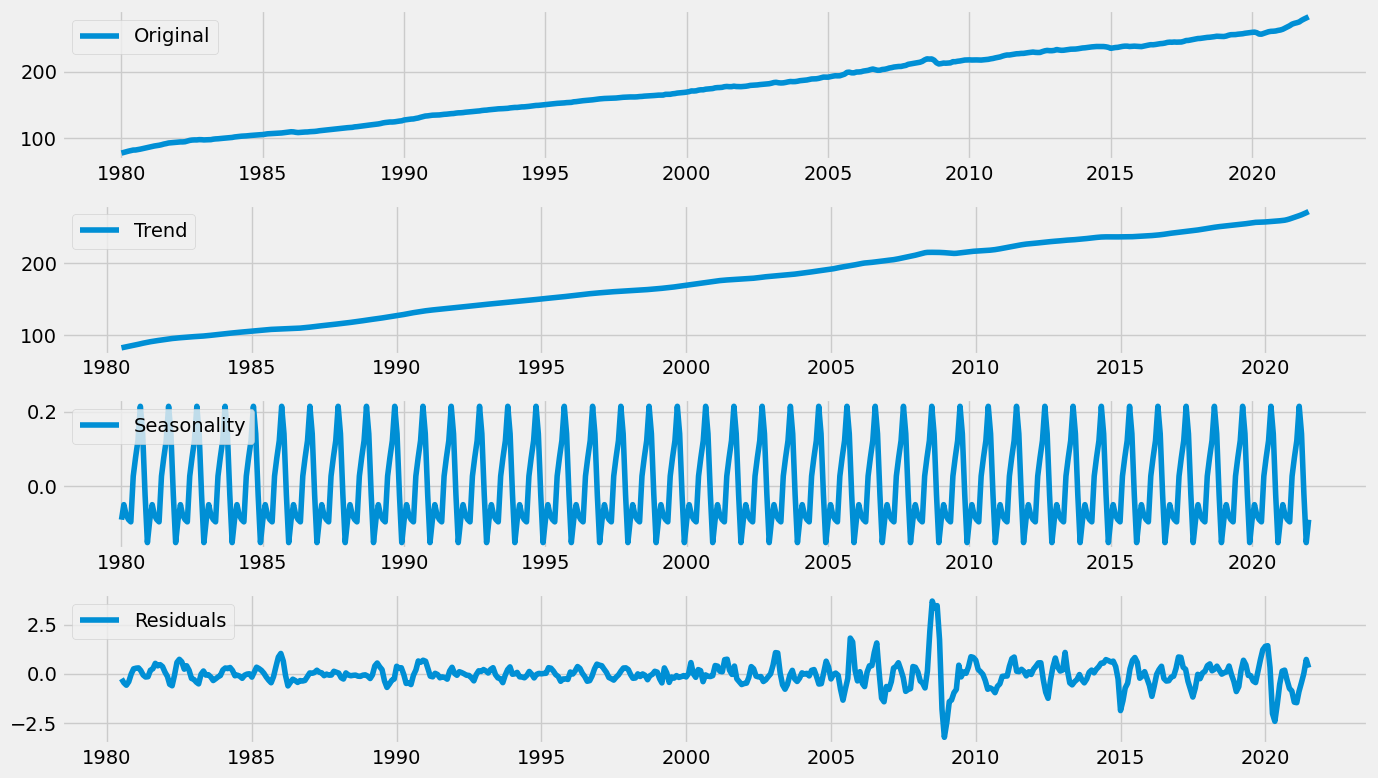

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposing the time series using an additive model
decomposition = seasonal_decompose(data_subset, model='additive')

# Get the individual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components of the time series
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(data_subset, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()

plt.show()



## CPI Decomposition (1980-2022)

Decomposing the CPI reveals:

- **Trend**: A clear, steady rise reflects ongoing inflation.
- **Seasonality**: Regular, stable yearly fluctuations suggest unchanged seasonal effects.
- **Residuals**: Random variations with no clear pattern, indicating well-captured trends and seasonality.

In essence, the analysis shows consistent inflation and well-behaved seasonal behavior over the past four decades.


# 05. Dickey-Fuller test to check for stationarity

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test on the CPI data
dickey_fuller_result = adfuller(data_subset['Value'])

# Output the results
print('Dickey-Fuller Test Statistic:', dickey_fuller_result[0])
print('p-value:', dickey_fuller_result[1])
print('Critical Values:')
for key, value in dickey_fuller_result[4].items():
    print(f'    {key}: {value:.3f}')


Dickey-Fuller Test Statistic: 1.3134139198142236
p-value: 0.9966829953737989
Critical Values:
    1%: -3.444
    5%: -2.867
    10%: -2.570


## Dickey-Fuller Stationarity Test

- **Test Statistic**: 1.313 (greater than critical values).
- **p-value**: ~0.997 (indicating non-stationarity).
- **Critical Values**: -3.444 (1%), -2.867 (5%), -2.570 (10%).

### Conclusion
With a positive test statistic and high p-value, the CPI data is non-stationary, suggesting a variable mean over time. Further differencing is required for stationarity.


## Conduct a round of differencing, repeating Dickey-Fuller test to check for stationarity

Dickey-Fuller Test Statistic (Differenced Data): -3.344427177557948
p-value (Differenced Data): 0.013005674378333202
Critical Values (Differenced Data):
    1%: -3.444
    5%: -2.867
    10%: -2.570


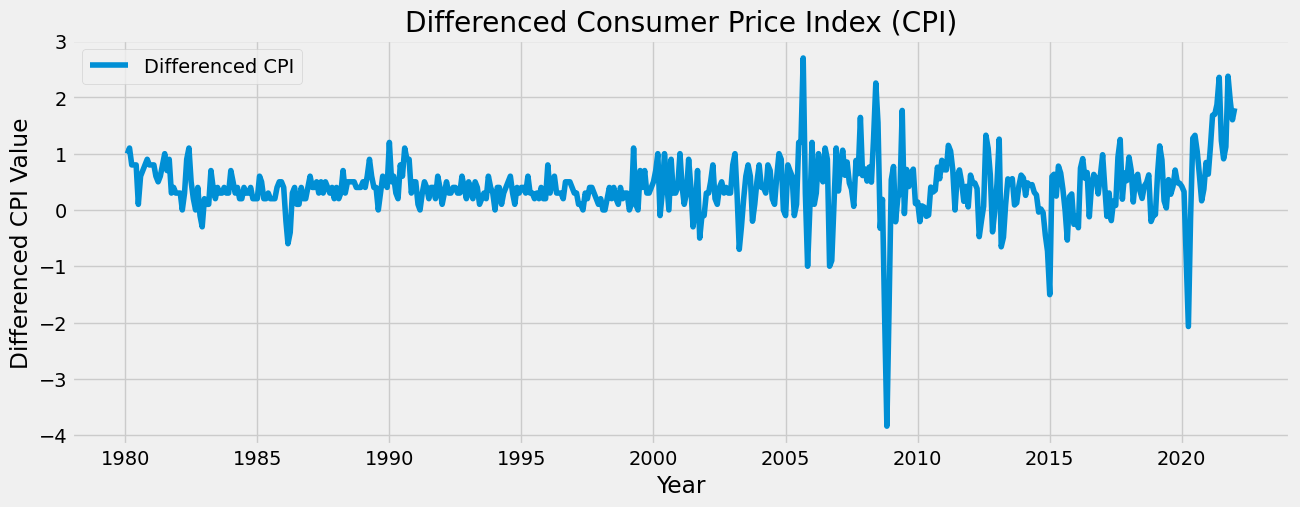

In [11]:
# Perform the differencing to make the data stationary
data_subset_diff = data_subset.diff().dropna()

# Perform the Dickey-Fuller test on the differenced data
dickey_fuller_result_diff = adfuller(data_subset_diff['Value'])

# Output the results for the differenced data
print('Dickey-Fuller Test Statistic (Differenced Data):', dickey_fuller_result_diff[0])
print('p-value (Differenced Data):', dickey_fuller_result_diff[1])
print('Critical Values (Differenced Data):')
for key, value in dickey_fuller_result_diff[4].items():
    print(f'    {key}: {value:.3f}')

# Plot the differenced data
plt.figure(figsize=(14, 5))
plt.plot(data_subset_diff, label='Differenced CPI')
plt.title('Differenced Consumer Price Index (CPI)')
plt.xlabel('Year')
plt.ylabel('Differenced CPI Value')
plt.legend()
plt.show()


Dickey-Fuller Test Statistic (Twice-Differenced Data): -10.304518707573674
p-value (Twice-Differenced Data): 3.3055462542198416e-18
Critical Values (Twice-Differenced Data):
    1%: -3.444
    5%: -2.867
    10%: -2.570


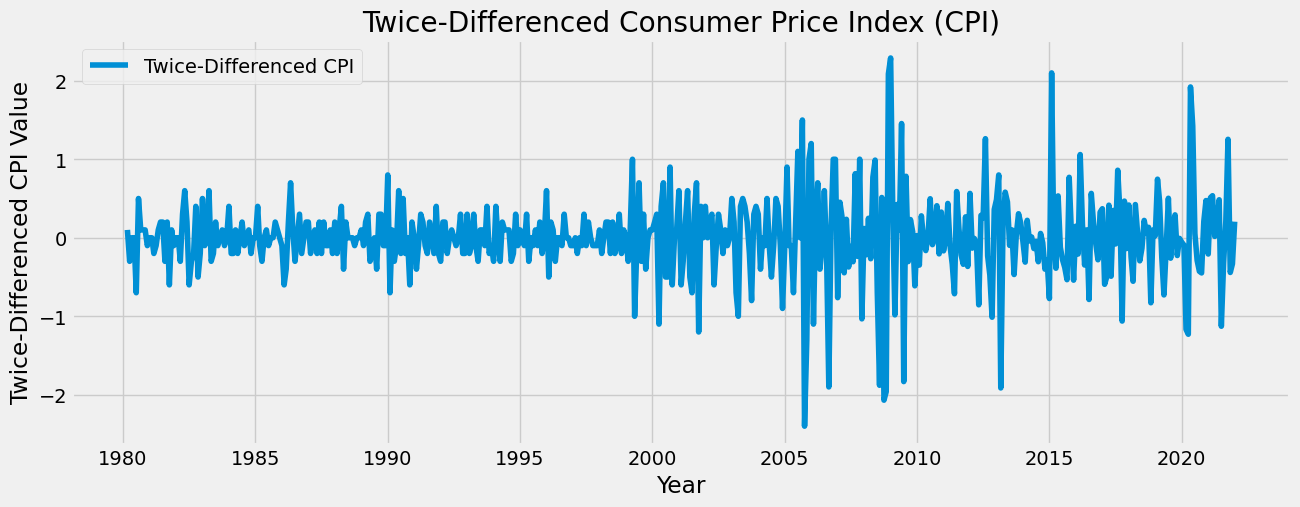

In [12]:
# Perform the second round of differencing
data_subset_diff_2 = data_subset_diff.diff().dropna()

# Perform the Dickey-Fuller test on the twice-differenced data
dickey_fuller_result_diff_2 = adfuller(data_subset_diff_2['Value'])

# Output the results for the twice-differenced data
print('Dickey-Fuller Test Statistic (Twice-Differenced Data):', dickey_fuller_result_diff_2[0])
print('p-value (Twice-Differenced Data):', dickey_fuller_result_diff_2[1])
print('Critical Values (Twice-Differenced Data):')
for key, value in dickey_fuller_result_diff_2[4].items():
    print(f'    {key}: {value:.3f}')

# Plot the twice-differenced data
plt.figure(figsize=(14, 5))
plt.plot(data_subset_diff_2, label='Twice-Differenced CPI')
plt.title('Twice-Differenced Consumer Price Index (CPI)')
plt.xlabel('Year')
plt.ylabel('Twice-Differenced CPI Value')
plt.legend()
plt.show()


#### The test statistic is far more negative than any of the critical values at the 1%, 5%, and 10% confidence levels. This indicates that we can reject the null hypothesis of the presence of a unit root with a high degree of confidence. The p-value is essentially zero, well below the common significance level of 0.05, strongly suggesting that the series is stationary.

# 06. Checking data’s autocorrelations

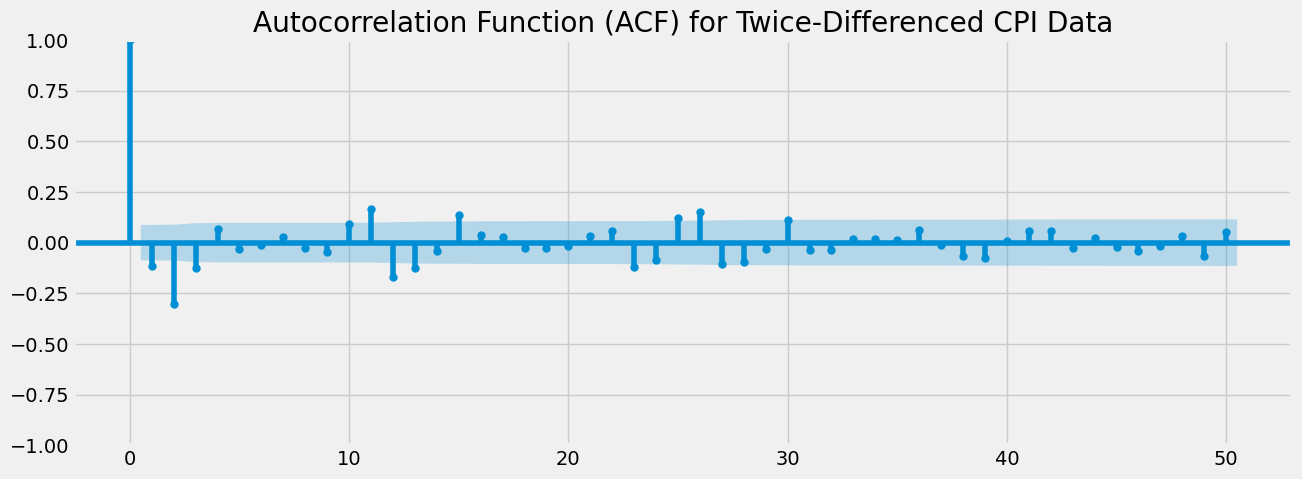

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the Autocorrelation Function (ACF) for the twice-differenced data
fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(data_subset_diff_2, lags=50, ax=ax)
plt.title('Autocorrelation Function (ACF) for Twice-Differenced CPI Data')
plt.show()


## ACF Plot Interpretation

- **Lag 0**: Autocorrelation is 1, as expected.
- **Subsequent Lags**: Significant spike at lag 1; other lags mostly within the confidence interval, indicating minimal autocorrelation.

### Summary

The ACF plot shows the twice-differenced CPI data is largely noise, confirming its stationarity. The initial spike suggests considering an autoregressive term in future modeling.
